# Assignment 1 - Exploratory Data Analysis

## Nathan Inkawhich
Netid:  nai2

## Instructions
Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.

## The Auto Dataset

**Source:** http://www-bcf.usc.edu/~gareth/ISL/data.html

**Contains:** Information on cars including: MPG, number of cylinders, displacement, horsepower, weight, acceleration, year, origin, and name

The Auto dataset contains information about cars produced in the time-period of 1970 to 1982. The data gives emperical measurements regarding efficiency and power of cars produced during this time period, and also shows trends in the data over the short span of collection. The reason this dataset is of interest is because it reflects the progression of car manufacturing and engineering over just 12 years.

Overall, the dataset is fairly clean and absent of pronounced erroneous values. The obvious problems with the data is there is not an equal representation of cars in each of the cylinder categories (i.e. there are far more 8 cylinder cars measured than 3 cylinder cars). Also, there are some missing horsepower measurements denoted as '?' in the data, however these missing measurements represent the vast minority.

Given the measurements provided, I am curious about the relationships present. 
Specifically, I would like to inspect:

1. How the number of cylinders impacts horsepower
2. The relationship of weight and mpg
3. The horsepower and mpg tradeoff
4. The trend of mpg over the 12 years


IGNORED: ['25', '4', '98', '?', '2046', '19', '71', '1', 'ford pinto']
IGNORED: ['21', '6', '200', '?', '2875', '17', '74', '1', 'ford maverick']
IGNORED: ['40.9', '4', '85', '?', '1835', '17.3', '80', '2', 'renault lecar deluxe']
IGNORED: ['23.6', '4', '140', '?', '2905', '14.3', '80', '1', 'ford mustang cobra']
IGNORED: ['34.5', '4', '100', '?', '2320', '15.8', '81', '2', 'renault 18i']


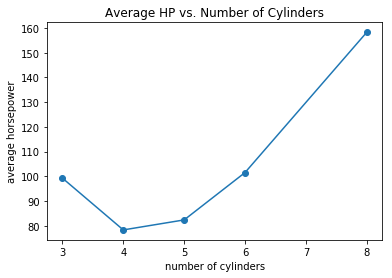

In [1]:
%matplotlib inline
import numpy as np
from csv import reader
import matplotlib
import matplotlib.pyplot as plt

# Read data from Auto.csv into a list of lists
data = list(reader(open("Auto.csv")))
       
# Extract the columns into arrays of floats for processing and plotting
# (Extracted without the first entry which is the name of the column)
mpg = [float(i[0]) for i in data[1::]]
cylinders = [float(i[1]) for i in data[1::]]
displacement = [float(i[2]) for i in data[1::]]
hpower = [float(i[2]) for i in data[1::]]
weight = [float(i[4]) for i in data[1::]]
accel = [float(i[5]) for i in data[1::]]
year = [float(i[6]) for i in data[1::]]

#print np.unique(cylinders)

# Find the average HP for each different cylinder count
# Note: the data for HP is NOT perfect, there are some '?', we will skip those here
avgHP_8cyl = 0.0
avgHP_6cyl = 0.0
avgHP_5cyl = 0.0
avgHP_4cyl = 0.0
avgHP_3cyl = 0.0
cnt_8cyl = 0
cnt_6cyl = 0
cnt_5cyl = 0
cnt_4cyl = 0
cnt_3cyl = 0

# for each entry in the dataset
for line in data[1::]:
    # get the cylinder count
    cyl = int(line[1])
    # check if the entry in the horsepower field is an integer
    if line[3].isdigit():
        hp = int(line[3])
        # if it is an 8 cylinder car
        if cyl == 8:
            cnt_8cyl += 1
            avgHP_8cyl += hp
            
        # if it is a 6 cylinder car
        elif cyl == 6:
            cnt_6cyl += 1
            avgHP_6cyl += hp
            
        # if it is an 5 cylinder car
        elif cyl == 5:
            cnt_5cyl += 1
            avgHP_5cyl += hp
            
        # if it is an 4 cylinder car
        elif cyl == 4:
            cnt_4cyl += 1
            avgHP_4cyl += hp
            
        # if it is an 3 cylinder car
        elif cyl == 3:
            cnt_3cyl += 1
            avgHP_3cyl += hp
            
        # if it is an invalid number of cylinders (should not happen)
        else:
            print "Abort: Unknown cylinder count"
            exit()
    else:
        print "IGNORED:",line
    
# Calculate averages
avgHP_8cyl /= float(cnt_8cyl)
avgHP_6cyl /= float(cnt_6cyl)
avgHP_5cyl /= float(cnt_5cyl)
avgHP_4cyl /= float(cnt_4cyl)
avgHP_3cyl /= float(cnt_3cyl)

hp_averages = [avgHP_3cyl, avgHP_4cyl, avgHP_5cyl, avgHP_6cyl, avgHP_8cyl]
num_cyl = [3,4,5,6,8]

# Plot the num of cylinders vs average hp
plt.plot(num_cyl,hp_averages,'-o')
plt.xlabel('number of cylinders')
plt.ylabel('average horsepower')
plt.title('Average HP vs. Number of Cylinders')
plt.show()
       

### Average Horsepower vs. Number of Cylinders

This plot shows the relationship between cylinder count and average horsepower. The general trend in this plot is as expected, the average horsepower increases as the number of cylinders increases. One suprising finding here is that the 3-cyl. cars have a higher average HP than 4-cyl. cars. As mentioned previously, the 3-cyl. and 5-cyl. cars are underrepresented in this dataset so we cannot make any definitive conclusions here without more data. Also, disregarding the 3-cyl., the average HP increases roughly linearly as the number of cylinders increases.

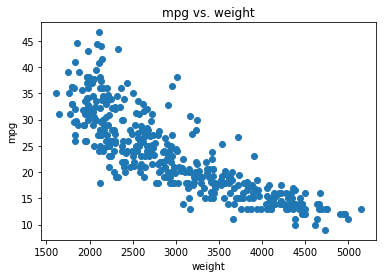

In [2]:
# Plot the mpg vs weight plot
plt.scatter(weight,mpg)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('mpg vs. weight')
plt.show()

### Miles Per Gallon vs. Weight

The second plot shows the relationship between weight and mpg. The trend deduced from this plot is that as weight increases, the mpg decreases. One suprising observation is that at lower weights, there is much more variation of mpg. However, as weight increases past 4000, there is not much variation in the data and the mpg seems to be converging to about 12 mpg. 

A natural question from this observation is in the lower weight classes, what are the factors that lead to the spred of the data? For example, at a weight of about 2000, the mpg varies from about 18 mpg to about 48 mpg. 

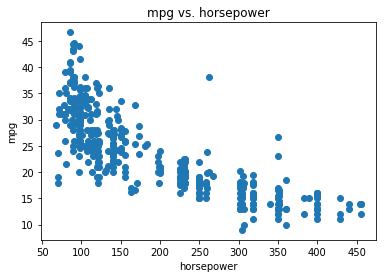

In [3]:
# Plot the mpg v. hpower plot
plt.scatter(hpower,mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('mpg vs. horsepower')
plt.show()

### Miles Per Gallon vs. Horsepower

This plot gives information regarding the efficiency of cars as a measure of mpg versus HP. A general trend that can be observed is as HP increases, the mpg decreases. Also, at the lower HP values, there is more variation in the mpg measurements, but as HP increases, the variation decreases significantly. One interesting observation is to focus on the data point around the 250 hp and 39 mpg position. Although this dataset does not provide the answer, it is interesting that at this HP measurement, this vehicle is VASTLY more efficient than its competitors.

Year [ 70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.]
Avg mpg: [[ 17.68965517  21.25        18.71428571  17.1         22.7037037
   20.26666667  21.57352941  23.375       24.06111111  25.09310345
   33.69655172  30.33448276  32.        ]]


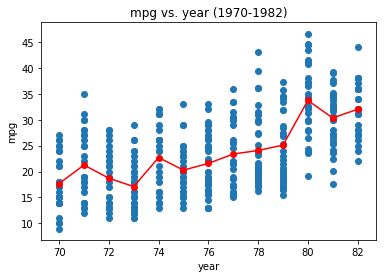

In [11]:
# Calculate the average mpg for every year
avg_mpg = np.zeros(shape=(13,1))
year_cnts = np.zeros(shape=(13,1))

for line in data[1::]:
    # calculate the index into the arrays
    indx = int(line[6]) - 70
    # extract the mpg from the line
    tmp_mpg = float(line[0])
    # record that you took a measurement from a given year
    year_cnts[indx] += 1
    # record the mpg for the appropriate year
    avg_mpg[indx] += tmp_mpg

# calculate the avg mpg for each year
for i in range(len(avg_mpg)):
    avg_mpg[i] /= year_cnts[i]
    
print "Year",np.unique(year)
print "Avg mpg:",np.transpose(avg_mpg)

# Plot the average and year vs mpg plot
plt.plot(np.unique(year),avg_mpg,'-or')
plt.scatter(year,mpg)
plt.xlabel('year')
plt.ylabel('mpg')
plt.title('mpg vs. year (1970-1982)')
plt.show()

### Miles Per Gallon vs. Production Year

Similarly to the previous two plots, this plot compares mpg to another feature of the data. Specifically, we inspect mpg vs year. Before discussing the results, we would expect (hope) to see an increase in the mpg as time passes. Fortunately, the data does show an average increase in mpg from 17.68 mpg in 1970 to 32 mpg in 1982. 

This plot communicates the improvements in engineering and design over the 12 year period. The fact that the average mpg almost doubled in 12 years is very impressive and shows a progression in the technology. Unfortunately, it does not seem as though this trend of doubling every twelve years has continued into the 21st century (although I have no data to corroborate this claim).

## Summary

As a result of exploring these data, we have uncovered some trends in the automotive industry, specifically between the years 1970 and 1982. The 'Auto' dataset provides 397 data points of vehicles produced during these years, each point containing information about mpg, number of cylinders, displacement, horsepower, weight, acceleration, and name. Through analysis, we formed some insights about relationships in the data and ultimately shed light on the four main points of interest discussed previously. The first observation is that in general, as the number of cylinders increases the average horsepower also increases. Another take-away is that as weight increases mpg decreases, and as horsepower increases mpg decreases. Finally, we discovered that average mpg almost doubled over the 12 year period!

Although our generalized findings all support intuition, there was also some interesting, less anticipated results. Mainly, how much variation in the data there is, and how some designs with set horsepower and weight have such differences in mpg. As a future work, it would be very interesting to further investigate why exactly there is so much variation in the data and also see how the average mpg progressed to today.
